<a href="https://colab.research.google.com/github/ntajxyooj/drowsiness/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load data for train

In [ ]:
train=pd.read_csv(r'/content/drive/MyDrive/Loan-Prediction/Dataset/train_1.csv')
train.isnull().sum()
train.head()

,id,acc_number,vbcode,client_loan_repayment_type_id,max_interest_m,start_date,loan_period_months,total_loan_amount,collateral_required,status_id
0,1,170100280007351,1701002,4,0.03,8/14/2019,12,2000000,0,4
1,2,170100280006951,1701002,4,0.03,8/14/2019,12,6000000,0,2
2,3,170100280006951,1701002,4,0.03,8/14/2019,12,6000000,0,2
3,4,170100280006951,1701002,4,0.03,8/14/2019,12,6000000,0,2
4,5,170100280006951,1701002,4,0.03,8/14/2019,12,6000000,0,2


# Load data for test

In [ ]:
Loan_status=train.status_id
train.drop('status_id',axis=1,inplace=True)
test=pd.read_csv(r'/content/drive/MyDrive/Loan-Prediction/Dataset/test_1.csv')
test.drop('status_id',axis=1,inplace=True)
Loan_ID=test.id
data=train.append(test)
data.head()

,id,acc_number,vbcode,client_loan_repayment_type_id,max_interest_m,start_date,loan_period_months,total_loan_amount,collateral_required
0,1,170100280007351,1701002,4,0.03,8/14/2019,12,2000000,0
1,2,170100280006951,1701002,4,0.03,8/14/2019,12,6000000,0
2,3,170100280006951,1701002,4,0.03,8/14/2019,12,6000000,0
3,4,170100280006951,1701002,4,0.03,8/14/2019,12,6000000,0
4,5,170100280006951,1701002,4,0.03,8/14/2019,12,6000000,0


In [ ]:
data.describe()

,id,acc_number,vbcode,client_loan_repayment_type_id,max_interest_m,loan_period_months,total_loan_amount,collateral_required
count,24144.000000,2.414400e+04,2.414400e+04,24144.000000,2.414400e+04,24144.000000,2.414400e+04,24144.000000
mean,12072.500000,1.702461e+14,1.702453e+06,4.014248,3.000000e-02,12.118912,5.384061e+06,0.024934
std,6969.916786,9.615373e+10,1.997341e+03,0.395638,1.726780e-14,18.341577,6.180267e+06,0.155926
min,1.000000,1.701003e+14,1.607018e+06,1.000000,3.000000e-02,3.000000,5.000000e+04,0.000000
25%,6036.750000,1.702012e+14,1.702011e+06,4.000000,3.000000e-02,12.000000,1.700000e+06,0.000000
50%,12072.500000,1.702037e+14,1.702037e+06,4.000000,3.000000e-02,12.000000,3.000000e+06,0.000000
75%,18108.250000,1.703016e+14,1.703015e+06,4.000000,3.000000e-02,12.000000,7.000000e+06,0.000000
max,24144.000000,1.705031e+14,1.705030e+06,8.000000,3.000000e-02,2020.000000,6.000000e+07,1.000000


In [ ]:
data.isnull().sum()

id                               0
acc_number                       0
vbcode                           0
client_loan_repayment_type_id    0
max_interest_m                   0
start_date                       0
loan_period_months               0
total_loan_amount                0
collateral_required              0
dtype: int64

# Plot data to graph

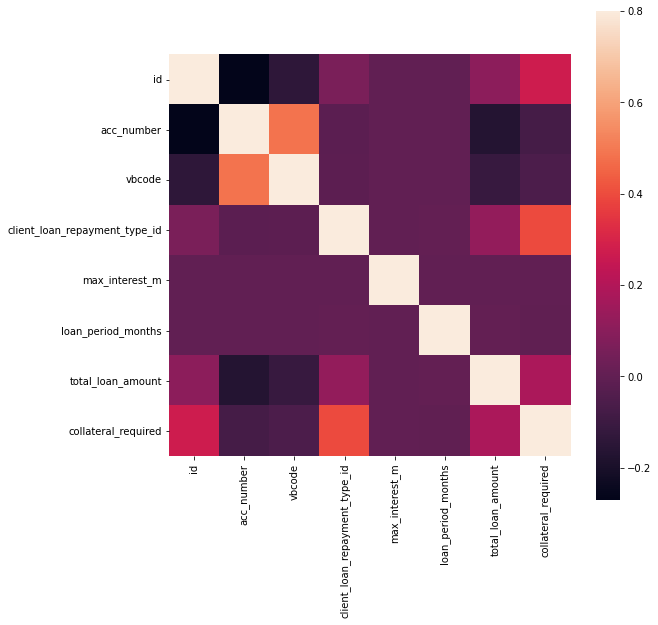

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [ ]:
data.head()

,id,acc_number,vbcode,client_loan_repayment_type_id,max_interest_m,start_date,loan_period_months,total_loan_amount,collateral_required
0,1,170100280007351,1701002,4,0.03,8/14/2019,12,2000000,0
1,2,170100280006951,1701002,4,0.03,8/14/2019,12,6000000,0
2,3,170100280006951,1701002,4,0.03,8/14/2019,12,6000000,0
3,4,170100280006951,1701002,4,0.03,8/14/2019,12,6000000,0
4,5,170100280006951,1701002,4,0.03,8/14/2019,12,6000000,0


In [ ]:
data.drop('start_date',inplace=True,axis=1)
data.drop('acc_number',axis=1,inplace=True)
data.drop('vbcode',axis=1,inplace=True)

In [ ]:
data.isnull().sum()

id                               0
client_loan_repayment_type_id    0
max_interest_m                   0
loan_period_months               0
total_loan_amount                0
collateral_required              0
dtype: int64

#Set value for test and train 

In [ ]:
train_X=data.iloc[:train['id'].count(),]
train_y=Loan_status
X_test=data.iloc[train['id'].count():,]
seed=5

# Training model and cross-validate model

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=seed)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
models=[]
models.append(("logreg",LogisticRegression()))
models.append(("tree",DecisionTreeClassifier()))
models.append(("lda",LinearDiscriminantAnalysis()))
models.append(("svc",SVC()))
models.append(("knn",KNeighborsClassifier()))
models.append(("nb",GaussianNB()))

In [ ]:
seed=5
scoring='accuracy'

In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [ ]:
for name,model in models:
    #print(model)
    kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

logreg 0.892333 0.004058
tree 0.861733 0.007821
lda 0.892267 0.003980
svc 0.892333 0.004058
knn 0.889133 0.007309
nb 0.892267 0.003980


#Save model trained  in file

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
# save the model to disk
filename = '/content/drive/MyDrive/Loan-Prediction/Dataset/finalized_model.h5'
pickle.dump(model, open(filename, 'wb'))


#Test Prediction and evalution 

In [ ]:
pred=model.predict(test_X)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.8728
[[4251  229]
 [ 407  113]]
              precision    recall  f1-score   support

           2       0.91      0.95      0.93      4480
           4       0.33      0.22      0.26       520

    accuracy                           0.87      5000
   macro avg       0.62      0.58      0.60      5000
weighted avg       0.85      0.87      0.86      5000



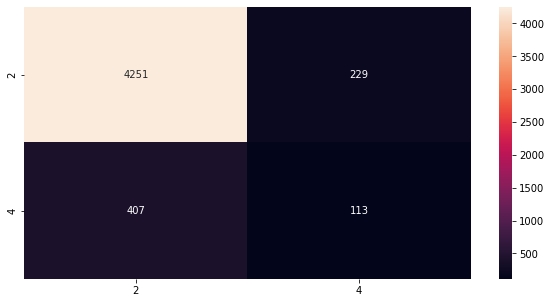

In [ ]:
matrix = confusion_matrix(test_y,pred)
df_cm = pd.DataFrame(matrix, index=[2,4], columns=[2,4])
figure = plt.figure(figsize=(10, 5))
sns.heatmap(df_cm, annot=True, fmt='d')

#Call model for to test Predect

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
df_output=pd.DataFrame()


In [ ]:
outp=loaded_model.predict(X_test).astype(int)
outp

array([2, 2, 2, ..., 4, 4, 4])

In [ ]:
df_output['id']=Loan_ID
df_output['status_id']=outp

In [ ]:
df_output.head()
#pd.set_option('display.max_rows', df_output.shape[0]+1)
#print(df_output)

,id,status_id
0,20001,2
1,20002,2
2,20003,2
3,20004,2
4,20005,2
